# Lab 2:  Problem 3

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

We will now use Newton's method to find the roots to a *complex* function, namely the function
    $$f_C(z) = z^3 - 1.$$
### a)
Write the complex function $f_C: \mathbb{C} \to \mathbb{C}$ as a real vector-valued function $\mathbf{f}: \mathbb{R}^2 \to \mathbb{R}^2$ and write down the Jacobian.  
(*Hint: use rectangular coordinates $z = x_1+\mathrm{i}x_2$)*

<font color='blue'>
    
   Solution: 

</font>

$$f_C(z) = z^3 - 1.$$ 
$$\Rightarrow  f_C(x+ iy) = x^3 + 3xy^2 - 1 + i(3x^2y-y^3)$$
$$\Rightarrow f_R(x, y) = f_1(x, y) + if_2(x, y)$$ 
$$\Rightarrow f(\mathbf{x}) = \begin{pmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \end{pmatrix}$$ $$ \mathbf{x} = \begin{pmatrix} x \\ y \end{pmatrix}, \quad f_1(\mathbf{x}) = x^3 + 3xy^2 - 1, \quad f_2(\mathbf{x}) = 3x^2y-y^3$$

$$J_f=\begin{pmatrix} \frac{\partial f_1}{\partial x} \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} \frac{\partial f_2}{\partial y} \end{pmatrix}$$

### b)
Write a function $\texttt{Newton}$ which performs Newton iteration until $\|\mathbf{f}(\mathbf{x}^k)\|_p$ is smaller than some given tolerance $tol$. You can choose what $p$-norm $\|\cdot\|_p$ you use. The function should take as input parameters  
 - Initial guess $\mathbf{x}^{(0)}$
 - tolerance $tol$
 - Maximum number of iterations $itermax$.  

The function should return the final iterate $\mathbf{x}^{(k)}$, and some indication of whether the iteration converged. 

In [2]:
# As alway we start by importing the important libraries.
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# function 1 and partial derivatives
f_1 = lambda x,y : x ** 3 - 3 * x * y ** 2 - 1
f_1_x = lambda x,y : 3 * x ** 2 - 3 * y ** 2
f_1_y = lambda x,y : - 6 * x * y
# function 2 and partial derivatives
f_2 = lambda x,y : 3 * x ** 2 * y - y ** 3
f_2_x = lambda x,y : 6 * x * y 
f_2_y = lambda x,y : 3 * x ** 2  - 3 * y ** 2
# function
f = lambda x : np.array([f_1(x[0],x[1]), f_2(x[0],x[1])])
# Jacobian
J_f = lambda x : np.array([[f_1_x(x[0],x[1]), f_1_y(x[0],x[1])], [f_2_x(x[0],x[1]), f_2_y(x[0],x[1])]])




def Newton(x0, tol, itermax, p=2):
    try:
        xk = x0
        err = 10 * tol #something bigger than tol
        i = 0
        while err > tol and i != itermax:
            xk_1 = xk - np.linalg.inv(J_f(xk)) @ f(xk)
            err = np.linalg.norm(f(xk_1), ord=p)
            xk = xk_1
            i += 1
        converged = True
        if i >= itermax:
            converged = False
        return xk, converged
    except:
        print("J_f is a singular matrix")
        return None, False



### c)
The function $\mathbf{f}$ has exactly three roots. (Which?) Hence, if the iteration converges it might converge to any of the three roots. You will now study the dependence on initial guess to which root the iteration converges. Pick $N$ equidistant values of $x^{(0)}_1$ in the interval $[-1,1]$ and $N$ equidistant values of $x^{(0)}_2$ in the interval $[-1,1]$. For each point $\mathbf{x}^{(0)} = (x^{(0)}_1, x^{(0)}_2)^T$, perform the newton iteration you have defined above. Give the point a color depending on whether the iteration converged in time. If the iteration converged, the point should get a different color depending on which point it converged to. Plot the result.

In [11]:
#Write code here
def run_newton_and_make_imshow(M=100, p=2):
    theta_list = np.zeros((M,M))
    i = 0
    for x_i in np.linspace(-1, 1, M):
        j = 0
        for x_j in np.linspace(-1, 1, M):
            x0 = np.array([x_i, x_j])
            xk, converged = Newton(x0, 1e-10, 1000, p=p)
            try:
                z = np.complex(xk[0], xk[1])
                theta_list[j, i] = np.angle(z)
            except:
                _ = None # Do nothing
            j += 1
            if not converged:
                print("did not converge, x0 = ", x0)
        i += 1
    plt.figure()
    plt.title("p = " + str(p))
    plt.imshow(theta_list)

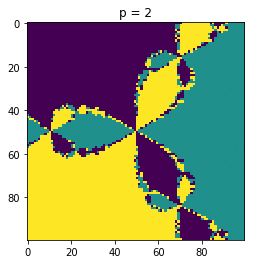

In [12]:
run_newton_and_make_imshow()

*Hint 1: You will encounter an error if you try with the initial guess $\mathbf{x}^{(0)} = \mathbf{0}$. It might be good to offset all initial guesses by some small perturbation $\mathbf{\delta}$.*     

*Hint 2: A good way to measure which root the iteration converged to is looking at the argument if the point as a complex number, that is $$\arg(x^{(k)}_1 + \mathrm{i}x^{(k)}_2).$$ Store the result in a $N\times N$ array. If the iteration did not converge, the point can be given the value* **None**. *The result can then be plotted using the matplotlib.pyplot function $\texttt{imshow}$.*

### d)
Discuss the following: Does it matter what $p$-norm you use in your Newton algorithm? What happens if you change norm? Does the result change qualitively? Remember that the $p$-norm on $\mathbb{R}^n$  is defined as
$$
\|\mathbf{x}\|_p := \left(\sum_{k=1}^n|x_k|^p\right)^{1/p}
$$
for $1<p<\infty$.

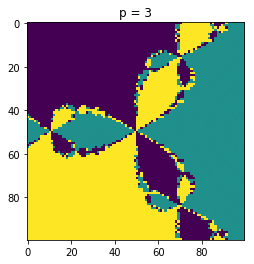

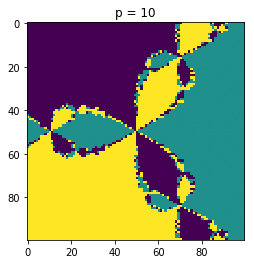

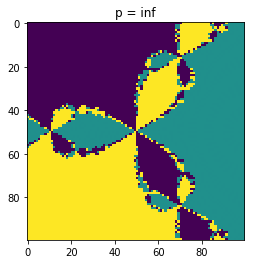

In [13]:
for p in [3, 10, np.inf]:
    run_newton_and_make_imshow(p=p)

<font color='blue'>
    
   Solution:
   
</font>

Since for any p-norm we have that: for any norm $q$ and $p$ the exists konstanst $k$ and $K$ such that $k ||.||_q \leq ||.||_p \leq K ||.||_q$, all p-norms are equivalent. See example above.

### e) (Not mandatory)
Modify your Newton function so that it returns the number of iterations used. Then, plot the number of iterations used for each initial guess $\mathbf{x}^{(0)}.$ What do you observe?

In [ ]:
#Write code here

### Remark
If you colored the plot according to the hint, the white parts are called the *Julia set* of the rational function $$Q(z) = z - \frac{f_C(z)}{f_C'(z)}.$$ The colored parts are called *Fatou components.* If you would like to more about the plot above and others like it, there is a link to the wikipedia page of [Julia sets](https://en.wikipedia.org/wiki/Julia_set).